## Detección de novedad

En Machine Learning y Estadística existen varios problemas que pueden ser tratados de manera similar. Estos son:

* Detección de outliers
* Detección de novedad
* Detección de anormalidad
* Clasificación de una clase

In [5]:
%matplotlib inline
import pandas as pd
data = pd.read_csv('local/data/creditcard.csv',sep=',')
data[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


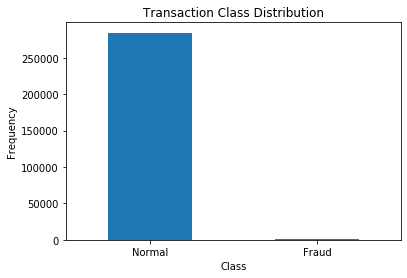

In [8]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS = ["Normal", "Fraud"]
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [14]:
Fraud = data[data['Class']==1]
Normal = data[data['Class']==0]
print('Porcentaje de fraude en la base de datos = ', Fraud.shape[0]/data.shape[0]*100, '%')

Porcentaje de fraude en la base de datos =  0.1727485630620034 %


Una forma de resolver el problema es estimar una función de densidad de probabilidad sobre el conjunto **Mayoritario** y definir un umbral a partil del cual se puede considerar que una nueva muestra pertenece al conjunto Mayoritario o no. Una forma alternativa es emplear un clasificador de una clase.

#### One-class classifier

El clasificador de una clase es una modificación del método de clasificación SVM para el problemas de una sola clase. 

One-class-svm.png



Considere un conjunto de datos sin etiqueta $X = \{{\bf{x}}_1,...,{\bf{x}}_m\} \subset \mathcal{X}$. 